# Pymaceuticals Inc.
---

### Analysis

- According to the data generated, Capomulin and Ramicane seems to be the drug treatments with the lowest average tumor volume in the final timepoint. The boxplot also proved that Capomulin and Ramicane were the most effective at reducing the tumor size as seen from its width and IQR as well as the lower (minimum, Q1, Q2, Q3 and maximum) tumor volumes. The tumor volume and timepoint line graph for a selected mouse further proved the effectiveness of the Capomulin drug. From the graph, the tumor volume decreased significantly as the number of treatment days increase. The tumor size decreased by about 16% from the starting time to the 45th day.
- Ultimately, it is recommended to use Capomulin as the drug of choice since it yielded the smallest tumor volumes over the course of the treatment.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete=pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")
mouse_data_complete.head()

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_data_complete["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_complete[mouse_data_complete.duplicated(subset=["Mouse ID","Timepoint"])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_duplicate=mouse_data_complete[mouse_data_complete["Mouse ID"]=="g989"]
mouse_data_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_cleaned=mouse_data_complete[mouse_data_complete["Mouse ID"]!="g989"]
mouse_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_cleaned["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_data_mean=mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_data_median=mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_data_variance=mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_data_std=mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_data_sem=mouse_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

mouse_data_summary=pd.DataFrame({"Mean Tumor Volume":mouse_data_mean, "Median Tumor Volume": mouse_data_median, 
                                 "Tumor Volume Variance":mouse_data_variance, 
                                 "Tumor Volume Std. Dev.":mouse_data_std, "Tumor Volume Std. Err.": mouse_data_sem})

mouse_data_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data_summary1=mouse_data_cleaned[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(["mean","median","var","std","sem"])

mouse_data_summary1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

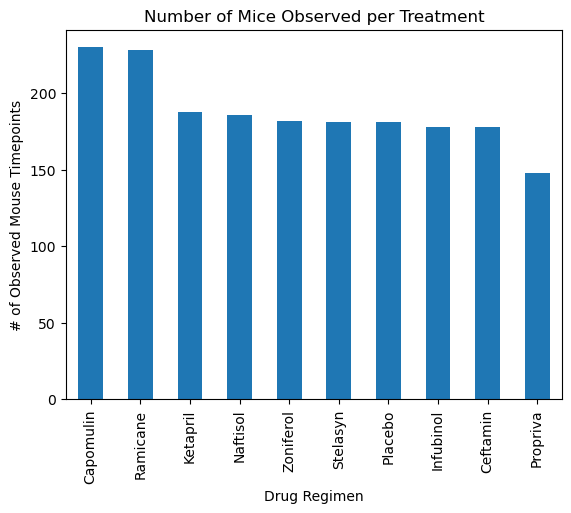

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint=mouse_data_cleaned["Drug Regimen"].value_counts()
timepoint.plot.bar(x="Drug Regimen", color="tab:blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice Observed per Treatment")
plt.show()

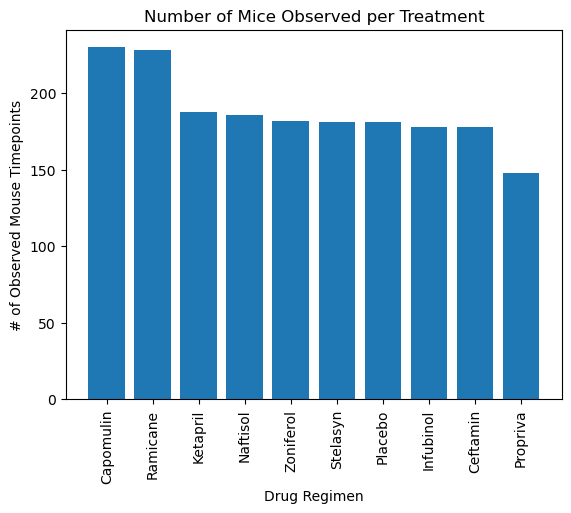

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=timepoint.index.values
y_axis=timepoint.values
plt.bar(x_axis, y_axis, alpha=0.999,align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.title("Number of Mice Observed per Treatment")
plt.show()

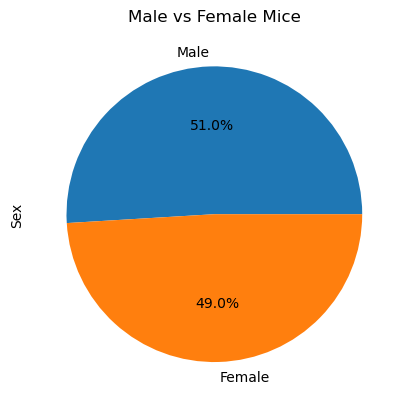

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_data_sex=mouse_data_cleaned["Sex"].value_counts()
mouse_data_sex.plot.pie(x="Sex",autopct= "%1.1f%%")
plt.title("Male vs Female Mice")
plt.show()

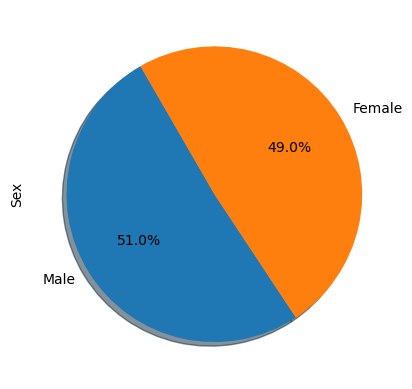

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis=mouse_data_sex.index.values
y_axis=mouse_data_sex.values
plt.pie(y_axis,labels=x_axis, autopct="%1.1f%%",shadow=True, startangle=120)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max=mouse_data_cleaned.groupby("Mouse ID").max()
timepoint_max_reset=timepoint_max.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_data_timepoint_merge=pd.merge(timepoint_max_reset[["Mouse ID","Timepoint"]],mouse_data_cleaned,how="left", on=["Mouse ID","Timepoint"])
mouse_data_timepoint_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_list= ["Ceftamin", "Ramicane", "Infubinol", "Capomulin"]
#drugs=mouse_data_timepoint_merge[mouse_data_timepoint_merge["Drug Regimen"].isin(Drug_list)]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in Drug_list:
    final_tumor_volume=mouse_data_timepoint_merge.loc[mouse_data_timepoint_merge["Drug Regimen"]==drug,"Tumor Volume (mm3)"] 
    tumor_volume_data.append(final_tumor_volume)
   
                    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    first_quartile = quartiles[0.25]
    second_quartile = quartiles[0.5]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    # Bounds
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5 *iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound)|(final_tumor_volume > upper_bound)]
            
    print(quartiles)
    print(f"{drug}:{outliers}")
    print(f"These are the outliers:{outliers}")

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
Ceftamin:Series([], Name: Tumor Volume (mm3), dtype: float64)
These are the outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
Ramicane:Series([], Name: Tumor Volume (mm3), dtype: float64)
These are the outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
Infubinol:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
These are the outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
Capomulin:Series([], Name: Tumor Volume (mm3), dtype: float64)
These are the outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


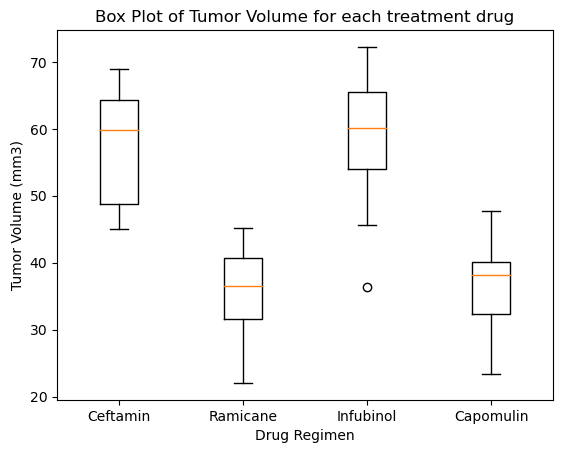

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1=plt.subplots()
ax1.boxplot(tumor_volume_data,labels=Drug_list, widths = 0.3, vert=True)

ax1.set_title("Box Plot of Tumor Volume for each treatment drug")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

plt.show()


## Line and Scatter Plots

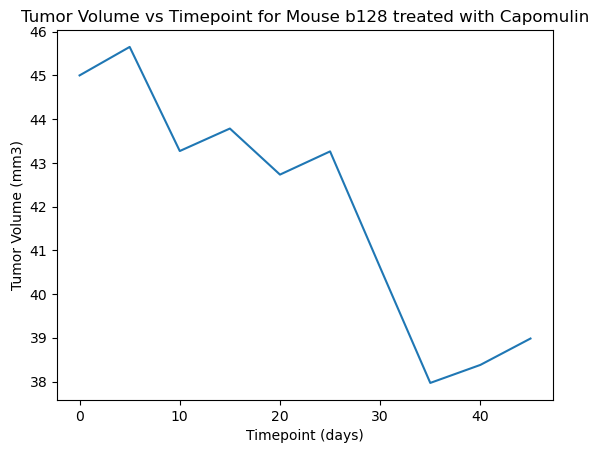

In [16]:
#Filtered cleaned data set for all mouse treated with Capomulin
Capomulin_df = mouse_data_cleaned.loc[mouse_data_cleaned["Drug Regimen"]=="Capomulin"]

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
b128_Capomulin_df = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="b128"]
b128_Capomulin_df

#Create a line plot

plt.plot(b128_Capomulin_df["Timepoint"],b128_Capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Tumor Volume vs Timepoint for Mouse b128 treated with Capomulin")
plt.show()


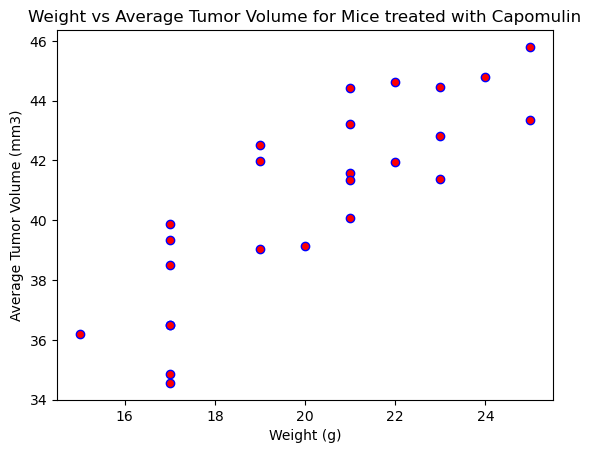

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

weight_Capomulin_df = Capomulin_df.groupby(["Mouse ID"])[["Tumor Volume (mm3)","Weight (g)"]].mean()
x_axis = weight_Capomulin_df["Weight (g)"]
y_axis = weight_Capomulin_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="blue",alpha=1)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume for Mice treated with Capomulin")
plt.show()

## Correlation and Regression

The correlation coefficient (r) is: 0.8419363424694721
The r-squared is: 0.7088568047708723


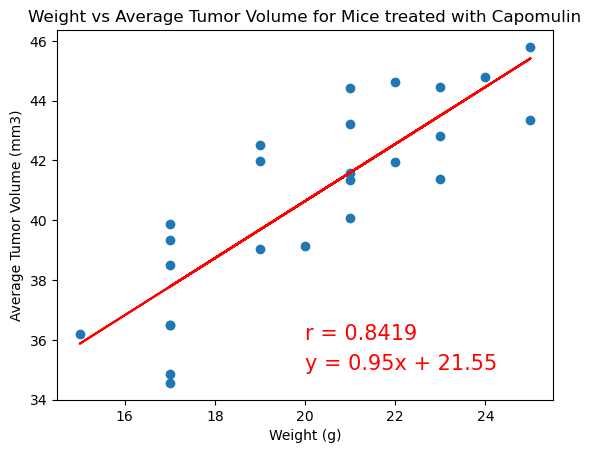

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.annotate(r, (20,36), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume for Mice treated with Capomulin")
print(f"The correlation coefficient (r) is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()